In [154]:
import psycopg2
import pandas as pd

conn = psycopg2.connect("host=localhost dbname=ohdsi user=postgres password=postgres")

coronary = """
SELECT p.gender_concept_id, p.year_of_birth as year, COUNT(DISTINCT p.person_id) as count
FROM condition_occurrence o
JOIN concept c on o.condition_concept_id = c.concept_id
JOIN person p on o.person_id = p.person_id
WHERE c.concept_name = 'Asthma'
GROUP BY p.gender_concept_id, year;
"""

total = """
SELECT gender_concept_id, year_of_birth as year, COUNT(person_id) as count
FROM person
GROUP BY gender_concept_id, year
ORDER BY year;
"""

df = pd.read_sql(coronary, conn)

totaldf = pd.read_sql(total, conn)

/Users/lukas/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/Users/lukas/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


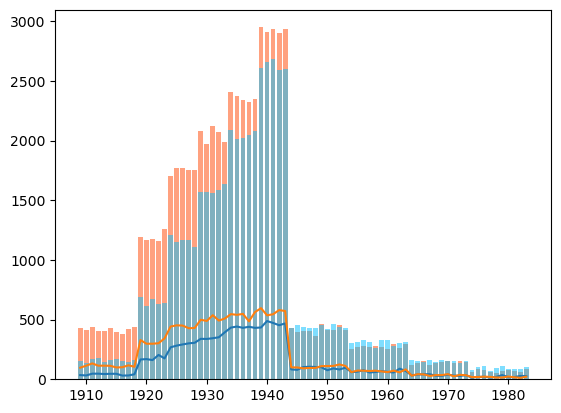

In [155]:
import matplotlib.pyplot as plt

x = df.where(df.gender_concept_id == 8532).dropna()["year"]
y = df.where(df.gender_concept_id == 8532).dropna()["count"]
xmen = df.where(df.gender_concept_id == 8507).dropna()["year"]
ymen = df.where(df.gender_concept_id == 8507).dropna()["count"]

xtot = totaldf.where(totaldf.gender_concept_id == 8532).dropna()["year"]
ytot = totaldf.where(totaldf.gender_concept_id == 8532).dropna()["count"]
xmentot = totaldf.where(totaldf.gender_concept_id == 8507).dropna()["year"]
ymentot = totaldf.where(totaldf.gender_concept_id == 8507).dropna()["count"]

plt.bar(xtot,ytot,align='center', alpha=0.5, color='orangered')
plt.bar(xmentot,ymentot,align='center', alpha=0.5, color='deepskyblue')
plt.plot(xmen, ymen)
plt.plot(x, y)
# plt.xlabel('Bins')
# plt.ylabel('Frequency')
plt.show()

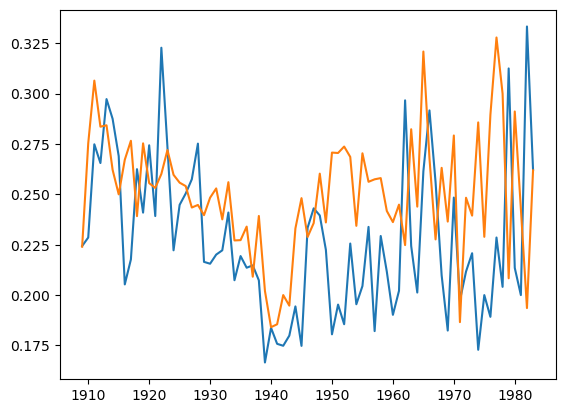

In [156]:
w = y.reset_index()["count"] / ytot.reset_index()["count"]
m = ymen.reset_index()["count"] / ymentot.reset_index()["count"]

plt.plot(xmen, m)
plt.plot(x, w)
plt.show()